dbscan (density-based spatial clustering of applications with noise): 밀도 기반 클러스터링

In [9]:
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [13]:
iris = load_iris()

iris_feature_names = list(map(lambda x: "_".join(x.split(" ")[:-1]), iris.feature_names))
iris_df = pd.DataFrame(iris.data, columns=iris_feature_names)

iris_df["target"] = iris.target
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
# eps : epsilon 거리 (해당 거리 안에 min_samples가 있으면 핵심 포인트로 선정)
# min_samples : 핵심 포인트가 되기 위한 최소한의 데이터 갯수
model = DBSCAN()

In [17]:
predict = model.fit_predict(iris.data)
iris_df["predict"] = predict
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [20]:
# -1 : noise (outlier) - 이상치
iris_df.groupby(["target", "predict"])["sepal_width"].count()

target  predict
0       -1          1
         0         49
1       -1          6
         1         44
2       -1         10
         1         40
Name: sepal_width, dtype: int64

In [21]:
# 2차원으로 시각화 해보자
iris_pca = PCA(n_components=2).fit_transform(iris.data)
iris_df["pca_1"] = iris_pca[:, 0]
iris_df["pca_2"] = iris_pca[:, 1]
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,predict,pca_1,pca_2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,1,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,1,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,1,1.900942,0.116628


<Axes: xlabel='pca_1', ylabel='pca_2'>

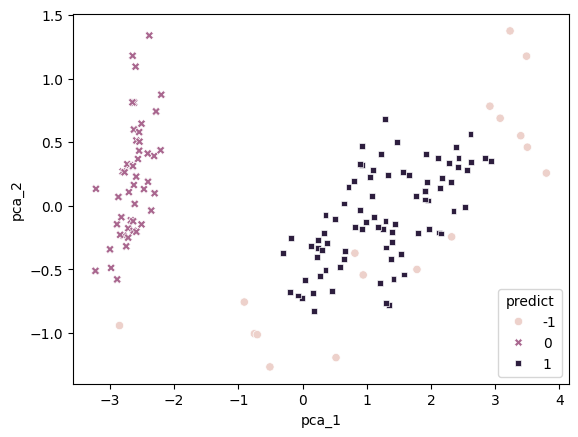

In [22]:
sns.scatterplot(data=iris_df, x="pca_1", y="pca_2", hue="predict", style="predict")

eps (epsilon) 거리를 정의

- core point : 핵심 포인트. min_samples 이상의 데이터를 가질 때, 군집의 중심으로 판별 -> 영역 확장
- border point : 경계 포인트. min_samples 미만의 데이터를 가질 때, 군집 내 데이터로 판별 -> 영역 확장 X
- noise point : 이상치 (outlier) -> 군집에 포함하지 않음